In [ ]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
os.chdir("C:\\Users\\RAMU\\Desktop\\Summer School")


In [ ]:
data=pd.read_csv("phone_reviewwordcloud.csv")
data=pd.DataFrame(data)
X=data["extract"]
X
y=data["score_feedback"]
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
930    1
931    0
932    1
933   -1
934    1
935    1
936   -1
937    1
938    1
939    1
940    1
941    1
942    1
943    1
944    1
945    1
946    1
947    1
948   -1
949    1
950   -1
951    1
952    1
953    1
954    1
955    0
956    1
957    1
958    1
959    1
Name: score_feedback, Length: 960, dtype: int64

In [ ]:
data_col=data.copy()
df2=data_col.drop(['sentiment'], axis=1)
df2

,text
0,The labs in EECS 588 aren't very engaging or c...
1,I didn't like EECS 417.
2,My three favorite classes in EECS have been EE...
3,Foundations of computer science looks difficul...
4,I have learned more in one month of Mobile App...
5,The first half of EECS 388 was wasted on rando...
6,ENGR 418 got me interested in Computer Science.
7,Professor Works is an amazing lecturer - I sta...
8,I really liked EECS 528.
9,EECS 425 is a class most students take to just...


In [ ]:
import pandas as pd
data1 = data[["extract"]]
                   
document=[]
a=[]
for i in range(len(data1)):
        a=data1.iloc[i][0]
        document.append(a)
        
document[0:5]

##--Defining Preprocessing Steps--##
import re
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def removeMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' ', text)
    return text

def removeMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' ', text)
    return text

def removeMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' ', text)
    return text

def countMultiExclamationMarks(text):
    """ Replaces repetitions of exlamation marks """
    return len(re.findall(r"(\!)\1+", text))

def countMultiQuestionMarks(text):
    """ Count repetitions of question marks """
    return len(re.findall(r"(\?)\1+", text))

def countMultiStopMarks(text):
    """ Count repetitions of stop marks """
    return len(re.findall(r"(\.)\1+", text))

def countElongated(text):
    """ Input: a text, Output: how many words are elongated """
    regex = re.compile(r"(.)\1{2}")
    return len([word for word in text.split() if regex.search(word)])

def countAllCaps(text):
    """ Input: a text, Output: how many words are all caps """
    return len(re.findall("[A-Z0-9]{3,}", text))

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def countEmoticons(text):
    """ Input: a text, Output: how many emoticons """
    return len(re.findall(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', text))

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def remove_hash(txt):
    """Removes Hash"""
    txt = re.sub(r'#', '', txt)
    return txt

def remove_at(txt):
    """remove @mentions"""
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    return txt


#######  PreProcessing  #########

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in str(doc).lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    urlr = remove_url(normalized)
    unicode = removeUnicode(urlr)
    hasht = remove_hash(unicode)
    at_user = remove_at(hasht)
    rmnumbers = removeNumbers(at_user)
    multiexclam = removeMultiExclamationMark(rmnumbers)
    multiques = removeMultiQuestionMark(multiexclam)
    multistop = removeMultiStopMark(multiques)
    emote = removeEmoticons(multistop)
    return emote

doc_clean = [clean(doc) for doc in document]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

docs = doc_clean
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df

,ability,able,aboslutely,about,absolute,absolutely,abused,ac,accept,acceptable,...,zc,zenfone,zenpone,zero,zing,zoom,zooming,zoominsufficient,zte,ztes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X_train.head()

,ability,able,aboslutely,about,absolute,absolutely,abused,ac,accept,acceptable,...,zc,zenfone,zenpone,zero,zing,zoom,zooming,zoominsufficient,zte,ztes
725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# fit() : used for generating learning model parameters from training data

transform() : parameters generated from fit() method,applied upon model to generate transformed data set.

fit_transform() : combination of fit() and transform() api on same data set

# The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

# A model parameter is a configuration variable that is internal to the model and whose value can be estimated from data. They are required by the model when making predictions.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train 

array([[-0.06262243, -0.10259784, -0.03610791, ...,  0.        ,
        -0.03610791, -0.03610791],
       [-0.06262243, -0.10259784, -0.03610791, ...,  0.        ,
        -0.03610791, -0.03610791],
       [-0.06262243,  9.74679434, -0.03610791, ...,  0.        ,
        -0.03610791, -0.03610791],
       ...,
       [-0.06262243, -0.10259784, -0.03610791, ...,  0.        ,
        -0.03610791, -0.03610791],
       [-0.06262243, -0.10259784, -0.03610791, ...,  0.        ,
        -0.03610791, -0.03610791],
       [-0.06262243, -0.10259784, -0.03610791, ...,  0.        ,
        -0.03610791, -0.03610791]])

k=1 71.08 (+/- 4.15)
k=2 67.96 (+/- 3.94)
k=3 75.90 (+/- 3.81)
k=4 75.78 (+/- 4.81)
k=5 76.30 (+/- 4.22)
k=6 76.68 (+/- 3.97)
k=7 76.68 (+/- 3.84)
k=8 76.68 (+/- 3.84)
k=9 76.68 (+/- 3.84)
k=10 76.68 (+/- 3.84)
k=11 76.68 (+/- 3.84)
k=12 76.68 (+/- 3.84)
k=13 76.68 (+/- 3.84)
k=14 76.68 (+/- 3.84)
k=15 76.68 (+/- 3.84)
k=16 76.68 (+/- 3.84)
k=17 76.68 (+/- 3.84)
k=18 76.68 (+/- 3.84)
k=19 76.68 (+/- 3.84)
k=20 76.68 (+/- 3.84)
k=21 76.68 (+/- 3.84)
k=22 76.68 (+/- 3.84)
k=23 76.68 (+/- 3.84)
k=24 76.68 (+/- 3.84)
k=25 76.68 (+/- 3.84)
The optimal number of neighbors is 5 with 76.7%


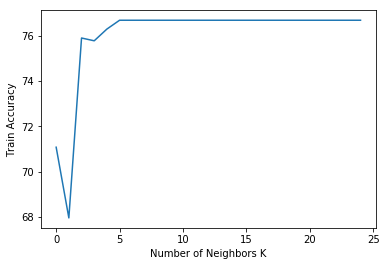

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(df, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
#Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), 
#and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
#here the below line refers to rounding the number.
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[  0   0  26]
 [  0   0  21]
 [  0   0 145]]
76.0


In [ ]:
print(KNNCV)

0.7682843472317156


In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[  0   0  26]
 [  0   0  21]
 [  0   0 145]]
76.0


In [ ]:
print(SVCCV)

0.7669856459330143


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[  3   1  22]
 [  2   0  19]
 [  1   1 143]]
76.0


In [ ]:
print(RFCCV )

0.7813568010936431


In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[  9   1  16]
 [  7   1  13]
 [ 16  27 102]]
57.99999999999999


In [ ]:
print(GAUSIAN)

0.6198051948051948


In [ ]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Gausian NB'],
                'Score':  [RFCCV, SVCCV, KNNCV,  GAUSIAN]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.781357
2,K-Near Neighbors,0.768284
1,Support Vector Machine,0.766986
3,Gausian NB,0.619805


# ANN

In [ ]:
#data=pd.read_csv("labeled_dtm.csv")

In [ ]:
#data_col=data.copy()
X=df
X

,ability,able,aboslutely,about,absolute,absolutely,abused,ac,accept,acceptable,...,zc,zenfone,zenpone,zero,zing,zoom,zooming,zoominsufficient,zte,ztes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

y
#y[y<0] = 0
#y

,sentiment
0,-1
1,-1
2,1
3,1
4,-1
5,-1
6,1
7,1
8,1
9,-1


In [ ]:
#from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=2637, activation='relu'))
model.add(Dense(2637, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
960/960 [==============================] - 1s 1ms/step - loss: 0.6141 - acc: 0.7646
Epoch 2/150
960/960 [==============================] - 0s 138us/step - loss: 0.2692 - acc: 0.7646
Epoch 3/150
960/960 [==============================] - 0s 140us/step - loss: -0.6374 - acc: 0.8073
Epoch 4/150
960/960 [==============================] - 0s 139us/step - loss: -1.3411 - acc: 0.8625
Epoch 5/150
960/960 [==============================] - 0s 143us/step - loss: -1.5044 - acc: 0.8812
Epoch 6/150
960/960 [==============================] - 0s 140us/step - loss: -1.5634 - acc: 0.8865
Epoch 7/150
960/960 [==============================] - 0s 139us/step - loss: -1.5764 - acc: 0.8906
Epoch 8/150
960/960 [==============================] - 0s 155us/step - loss: -1.5920 - acc: 0.8875
Epoch 9/150
960/960 [==============================] - 0s 181us/step - loss: -1.6045 - acc: 0.8896
Epoch 10/150
960/960 [==============================] - 0s 154us/step - loss: -1.6100 - acc: 0.8896
Epoch 11/150


In [ ]:
print(X.shape)

(1040, 481)


In [ ]:
print(X.size)

500240


In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

960/960 [==============================] - 0s 108us/step
Accuracy: 89.48


In [ ]:
#predict_data=predict[["Predictions"]]
#predict_data

# Sentiment Analysis with textblob

In [ ]:
data=pd.read_csv("kotzias_yelp.csv")
data=pd.DataFrame(data)
data
#cs=pd.concat([data,y],axis=1)
#cs.to_csv("testdata_Classfication.csv")

NameError: ignored

In [ ]:
import pandas as pd
data1 = data[["text"]]
                   
document=[]
a=[]
for i in range(len(data1)):
        a=data1.iloc[i][0]
        document.append(a)
        
document[0:5]

##--Defining Preprocessing Steps--##
import re
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def removeMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' ', text)
    return text

def removeMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' ', text)
    return text

def removeMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' ', text)
    return text

def countMultiExclamationMarks(text):
    """ Replaces repetitions of exlamation marks """
    return len(re.findall(r"(\!)\1+", text))

def countMultiQuestionMarks(text):
    """ Count repetitions of question marks """
    return len(re.findall(r"(\?)\1+", text))

def countMultiStopMarks(text):
    """ Count repetitions of stop marks """
    return len(re.findall(r"(\.)\1+", text))

def countElongated(text):
    """ Input: a text, Output: how many words are elongated """
    regex = re.compile(r"(.)\1{2}")
    return len([word for word in text.split() if regex.search(word)])

def countAllCaps(text):
    """ Input: a text, Output: how many words are all caps """
    return len(re.findall("[A-Z0-9]{3,}", text))

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def countEmoticons(text):
    """ Input: a text, Output: how many emoticons """
    return len(re.findall(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', text))

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def remove_hash(txt):
    """Removes Hash"""
    txt = re.sub(r'#', '', txt)
    return txt

def remove_at(txt):
    """remove @mentions"""
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    return txt


#######  PreProcessing  #########

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    urlr = remove_url(normalized)
    unicode = removeUnicode(urlr)
    hasht = remove_hash(unicode)
    at_user = remove_at(hasht)
    rmnumbers = removeNumbers(at_user)
    multiexclam = removeMultiExclamationMark(rmnumbers)
    multiques = removeMultiQuestionMark(multiexclam)
    multistop = removeMultiStopMark(multiques)
    emote = removeEmoticons(multistop)
    return emote

doc_clean = [clean(doc) for doc in document]

from textblob import TextBlob
def get_tweet_sentiment(tweet):
  '''
  Get sentiment value of the tweet text
  It can be either positive, negative or neutral
  '''
  # create TextBlob object of the passed tweet text
  blob = TextBlob(tweet)
 
  # get sentiment
  if blob.sentiment.polarity > 0:
    sentiment = 'positive'
  elif blob.sentiment.polarity < 0:
    sentiment = 'negative'
  else:
    sentiment = 'neutral'
 
  return sentiment


document[0]

def get_processed_tweets(tweets):
  '''
  Get array of processed tweets containing 
  the tweet text and its sentiment value
  '''
  processed_tweets = []
  j=0
 
  for tweet in tweets:
    tweet_dict = {}
    tweet_dict['text'] = document[j] 
    tweet_dict['sentiment'] = get_tweet_sentiment(tweet)
    j = j+1
 
    processed_tweets.append(tweet_dict)
 
  return processed_tweets

tweets_with_sentiment = get_processed_tweets(doc_clean)

positive_tweets = [tweet for tweet in tweets_with_sentiment if tweet['sentiment'] == 'positive']
negative_tweets = [tweet for tweet in tweets_with_sentiment if tweet['sentiment'] == 'negative']
neutral_tweets = [tweet for tweet in tweets_with_sentiment if tweet['sentiment'] == 'neutral']

positive_percent = 100 * len(positive_tweets) / len(tweets_with_sentiment)
negative_percent = 100 * len(negative_tweets) / len(tweets_with_sentiment)
neutral_percent  = 100 * len(neutral_tweets)  / len(tweets_with_sentiment)
 
print ('Positive Tweets  | Count: {} , Percent: {} % '. format(len(positive_tweets), positive_percent))
print ('Negative Tweets | Count: {} , Percent: {} %' . format(len(negative_tweets), negative_percent))
print ('Neutral Tweets  | Count: {} , Percent: {} %' . format(len(neutral_tweets), neutral_percent))

print(tweets_with_sentiment[0:10])
print(document[0])

In [ ]:
Sentiment=pd.DataFrame(tweets_with_sentiment)
Sentiment

# Sentiment Analysis with Vader

In [ ]:
#pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
analyser.polarity_scores("The phone is super cool.")

{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}

In [ ]:
sentiment_analyzer_scores("The phone is super cool.")

The phone is super cool.---------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


In [ ]:
data.columns=["text"]

In [ ]:
Senti=[]
for index, row in data.iterrows():
    #print(sentiment_analyzer_scores(row['text']))
    s3=analyser.polarity_scores(row['text'])
    Senti.append(s3)

In [ ]:
Senti_data=pd.DataFrame(Senti)
Senti_sum=Senti_data.sum()
Senti_sum.columns=["Total_Sentiment_count"]
Senti_sum

compound    215.1325
neg         123.1800
neu         604.9270
pos         309.9000
dtype: float64

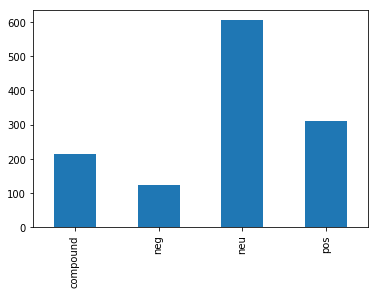

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns
Senti_sum.plot(kind='bar',x='name',y='Total_Sentiment_count')

# Emotion Analysis

In [ ]:
import pandas as pd
data1 = data[["text"]]
                   
document=[]
a=[]
for i in range(len(data1)):
        a=data1.iloc[i][0]
        document.append(a)
        
document[0:5]

##--Defining Preprocessing Steps--##
import re
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def removeMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' ', text)
    return text

def removeMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' ', text)
    return text

def removeMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' ', text)
    return text

def countMultiExclamationMarks(text):
    """ Replaces repetitions of exlamation marks """
    return len(re.findall(r"(\!)\1+", text))

def countMultiQuestionMarks(text):
    """ Count repetitions of question marks """
    return len(re.findall(r"(\?)\1+", text))

def countMultiStopMarks(text):
    """ Count repetitions of stop marks """
    return len(re.findall(r"(\.)\1+", text))

def countElongated(text):
    """ Input: a text, Output: how many words are elongated """
    regex = re.compile(r"(.)\1{2}")
    return len([word for word in text.split() if regex.search(word)])

def countAllCaps(text):
    """ Input: a text, Output: how many words are all caps """
    return len(re.findall("[A-Z0-9]{3,}", text))

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def countEmoticons(text):
    """ Input: a text, Output: how many emoticons """
    return len(re.findall(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', text))

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def remove_hash(txt):
    """Removes Hash"""
    txt = re.sub(r'#', '', txt)
    return txt

def remove_at(txt):
    """remove @mentions"""
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    return txt


#######  PreProcessing  #########

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    urlr = remove_url(normalized)
    unicode = removeUnicode(urlr)
    hasht = remove_hash(unicode)
    at_user = remove_at(hasht)
    rmnumbers = removeNumbers(at_user)
    multiexclam = removeMultiExclamationMark(rmnumbers)
    multiques = removeMultiQuestionMark(multiexclam)
    multistop = removeMultiStopMark(multiques)
    emote = removeEmoticons(multistop)
    return emote

doc_clean = [clean(doc) for doc in document]

from textblob import TextBlob
from nrclex import NRCLex

data=pd.DataFrame(doc_clean)

In [ ]:
text_object = NRCLex('Finally I made it with emotional analysis. just pending work is need to frame the data according to your Screen Shot madam')

In [ ]:
text_object.top_emotions

[('fear', 0.11475409836065574),
 ('anger', 0.11475409836065574),
 ('anticip', 0.11475409836065574),
 ('trust', 0.11475409836065574),
 ('positive', 0.11475409836065574),
 ('disgust', 0.11475409836065574)]

In [ ]:
data.columns=["text"]
df1=[]
for index, row in data.iterrows():
    df=NRCLex(row['text'])
    #print(df.text)
    df3=df.affect_frequencies
    df1.append(df3)
    

In [ ]:
#data=pd.DataFrame(doc_clean)

In [ ]:
d=pd.DataFrame(df1)
d

,anger,anticip,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000
1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.105263,0.052632,0.105263,0.105263,0.105263,0.105263,0.157895,0.105263,0.052632,0.105263
4,0.090909,0.121212,0.090909,0.090909,0.121212,0.090909,0.121212,0.090909,0.090909,0.090909
5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
6,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
7,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
8,0.109091,0.090909,0.109091,0.090909,0.090909,0.109091,0.109091,0.090909,0.090909,0.109091
9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [ ]:
df=d.sum()
Emotion=pd.DataFrame(df)

#Emote=Emotion.transpose()
#Emote
Emotion.columns=["Emotions"]
Emotion

,Emotions
anger,96.234577
anticip,92.475226
disgust,98.555230
fear,95.699808
joy,100.401288
negative,110.207725
positive,119.794586
sadness,97.945657
surprise,92.275030
trust,103.410874


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns

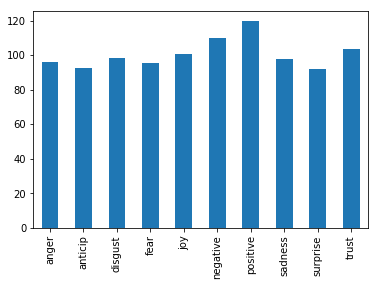

In [ ]:
df.plot(kind='bar',x='name',y='Emotions')